In [1]:
import tomoSegmentPipeline.dataloader as dl
from tomoSegmentPipeline.utils import setup
from tomoSegmentPipeline.dataloader import to_categorical, transpose_to_channels_first
from tomoSegmentPipeline.trainWrapper import make_trainer

PARENT_PATH = setup.PARENT_PATH

import os
import matplotlib.pyplot as plt

import torch

%matplotlib inline
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2

In [2]:
train_tomos = ['tomo02', 'tomo03', 'tomo17']
concat_train_ids = sorted([s.replace('tomo', '') for s in train_tomos])
concat_train_ids = '-'.join(concat_train_ids)

val_tomos = ['tomo32', 'tomo10']
concat_val_ids = sorted([s.replace('tomo', '') for s in val_tomos])
concat_val_ids = '-'.join(concat_val_ids)

test_tomos = ['tomo38', 'tomo04']
concat_test_ids = sorted([s.replace('tomo', '') for s in test_tomos])
concat_test_ids = '-'.join(concat_test_ids)

tomo_ids, tomo_idx = setup.get_isenseeTomo_indices()
path_data, path_target = setup.get_paths([t for t in tomo_ids if t[0:6] in train_tomos])

# path_data

Pairs of tomo IDs to indices:
[('tomo02_patch000', 0), ('tomo02_patch001', 1), ('tomo02_patch002', 2), ('tomo02_patch003', 3), ('tomo02_patch004', 4), ('tomo02_patch005', 5), ('tomo02_patch006', 6), ('tomo02_patch020', 7), ('tomo02_patch021', 8), ('tomo02_patch030', 9), ('tomo03_patch000', 10), ('tomo03_patch002', 11), ('tomo03_patch004', 12), ('tomo03_patch006', 13), ('tomo03_patch008', 14), ('tomo03_patch010', 15), ('tomo03_patch020', 16), ('tomo03_patch021', 17), ('tomo03_patch022', 18), ('tomo03_patch030', 19), ('tomo03_patch031', 20), ('tomo03_patch032', 21), ('tomo04_patch000', 22), ('tomo04_patch002', 23), ('tomo04_patch004', 24), ('tomo04_patch006', 25), ('tomo04_patch008', 26), ('tomo04_patch009', 27), ('tomo04_patch020', 28), ('tomo04_patch021', 29), ('tomo04_patch030', 30), ('tomo10_patch001', 31), ('tomo10_patch002', 32), ('tomo10_patch003', 33), ('tomo10_patch009', 34), ('tomo10_patch010', 35), ('tomo10_patch011', 36), ('tomo10_patch020', 37), ('tomo10_patch030', 38), ('to

# Check dataloader

In [13]:
dim_in = 56
Lrnd = 5

my_dataset = dl.tomoSegment_dataset(path_data, path_target, dim_in, Ncl=2, Lrnd=Lrnd, augment_data=False)
# my_dataset = dl.tomoSegment_dummyDataset(path_data, path_target, dim_in, Ncl=2)
len(my_dataset)

%timeit my_dataset[0]

6.53 ms ± 2.2 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [17]:
dim_in = 160
Lrnd = 5

my_dataset = dl.tomoSegment_dataset(path_data, path_target, dim_in, Ncl=2, Lrnd=Lrnd, augment_data=False)
# my_dataset = dl.tomoSegment_dummyDataset(path_data, path_target, dim_in, Ncl=2)
len(my_dataset)

%timeit my_dataset[0]

50.2 ms ± 391 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [77]:
dataset = dl.tomoSegment_dummyDataset
dataset(path_data, path_target, dim_in, Ncl=2)

In [12]:
%timeit my_dataset[0]

5.65 ms ± 1.19 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


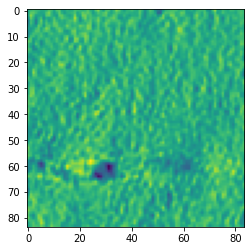

In [8]:
batch_data, batch_target = my_dataset[0]
plt.imshow(batch_data.squeeze()[dim_in//2])

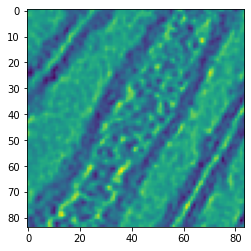

In [74]:
batch_data, batch_target = my_dataset[0]
plt.imshow(batch_data.squeeze()[dim_in//2])

In [58]:
batch_data.shape

torch.Size([1, 84, 84, 84])

# Model tryouts

In [9]:
paths_trainData, paths_trainTarget = setup.get_paths([t for t in tomo_ids if t[0:6] in train_tomos])
paths_valData, paths_valTarget = setup.get_paths([t for t in tomo_ids if t[0:6] in val_tomos])

In [10]:
len(paths_trainData)

32

In [4]:
paths_trainData[0:1], paths_trainTarget[0:1]

(['/home/haicu/jeronimo.carvajal/Thesis/data/nnUnet/Task143_cryoET7/imagesTr/tomo02_patch000_0000.nii.gz'],
 ['/home/haicu/jeronimo.carvajal/Thesis/data/nnUnet/Task143_cryoET7/labelsTr/tomo02_patch000.nii.gz'])

In [5]:
tb_logdir = os.path.join(PARENT_PATH, 'models_scratchpad/logs/BaselineModel/train%s' %concat_train_ids)

trainer = make_trainer(dim_in=160, batch_size=1, lr=1e-4, epochs=500, tb_logdir=tb_logdir, model_name='3.00_BaselineTestRun',
                       reconstruction_trainer=False, pretrained_model=None, test_run=True)

In [6]:
trainer.launch(paths_trainData[0:1], paths_trainTarget[0:1], paths_valData[0:1], paths_valTarget[0:1], dl.tomoSegment_dummyDataset)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Set SLURM handle signals.

  | Name    | Type         | Params
-----------------------------------------
0 | loss_fn | Tversky_loss | 0     
1 | layer1  | Sequential   | 28.6 K
2 | layer2  | Sequential   | 103 K 
3 | layer3  | Sequential   | 558 K 
4 | layer4  | Sequential   | 288 K 
5 | layer5  | Sequential   | 96.9 K
-----------------------------------------
1.1 M     Trainable params
0         Non-trainable params
1.1 M     Total params
4.304     Total estimated model params size (MB)


"Ncl":           2
"loss_fn":       Tversky_loss()
"lr":            0.0001
"pretrain_type": None
"weight_decay":  0.0
Saving model at:  /home/haicu/jeronimo.carvajal/Thesis/models_scratchpad/logs/BaselineModel/train02-03-17/version_4/3.00_BaselineTestRun_ep500_in160_lr0.000100_4.model

Writing to modelSummary...
Opening ModelSummary file...
ModelSummary file exists, appending current model data...


# Sanity Checks

In [3]:
from tomoSegmentPipeline.showcaseResults import (predict_fullTomogram, load_model, load_tomoData, Tversky_index,
                                        fullTomogram_modelComparison, make_comparison_plot, write_comparison_gif, save_classPred)

from tomoSegmentPipeline.losses import Tversky_loss

from tomoSegmentPipeline.utils.common import read_array

import numpy as np
import matplotlib.pyplot as plt
import random
import mrcfile
import pandas as pd
import torch

%matplotlib inline
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
paths_trainData, paths_trainTarget = setup.get_paths([t for t in tomo_ids if t[0:6] in train_tomos])
paths_valData, paths_valTarget = setup.get_paths([t for t in tomo_ids if t[0:6] in val_tomos])

paths_trainData[0:1], paths_trainTarget[0:1]

(['/home/haicu/jeronimo.carvajal/Thesis/data/nnUnet/Task143_cryoET7/imagesTr/tomo02_patch000_0000.nii.gz'],
 ['/home/haicu/jeronimo.carvajal/Thesis/data/nnUnet/Task143_cryoET7/labelsTr/tomo02_patch000.nii.gz'])

In [9]:
from tomoSegmentPipeline.dataloader import tomoSegment_dataset, to_categorical, transpose_to_channels_first

def fullTomogram_modelComparison2(model_fileList, n_centers_list, tomo_file, label_file, is_model_data=True):
    
    tomogram_data, classes = load_tomoData(tomo_file, label_file, is_model_data)

    z, y, x = tomogram_data.shape

    classes = torch.tensor(classes)
    Nclass_data = int(classes.max()+1)


    classes = transpose_to_channels_first(to_categorical(classes, num_classes=Nclass_data))

    y_true = torch.zeros((1, Nclass_data, z, y, x))
    y_true[0, :, :, :, :] = classes

    weight_decay = 0

    class_predDict = {}
    dice1_dict = {}

    for model_file, n_centers in zip(model_fileList, n_centers_list):
        Nclass_model = 2
        model = load_model(model_file,  Nclass_model, weight_decay)
        model_name = model_file.split('/')[-1].replace('.model', '')

        dim_in = int(model_file.split('in')[-1].split('_')[0])
        
        class_pred = predict_fullTomogram(tomogram_data, model, dim_in, n_centers, Nclass_model)
        print('Saving model predictions...')
        save_classPred(class_pred, model_name, tomo_file, True)

        class_predDict[model_name] = class_pred

        y_pred = torch.zeros((1, Nclass_model, z, y, x))
        y_pred[0, :, :, :, :] = transpose_to_channels_first(to_categorical(class_pred, Nclass_model))
        
        Nclass = min(Nclass_data, Nclass_model)
        
        y_true = y_true[:, 0:Nclass, :, :, :]
        y_pred = y_pred[:, 0:Nclass, :, :, :]

        dice1 = Tversky_index(y_true, y_pred)
        dice1_dict[model_name] = dice1

    tomo_name = tomo_file.split('/')[-1]
    
    return class_predDict, dice1_dict, classes, tomogram_data

In [10]:
model_fileList = [os.path.join(PARENT_PATH, 'models_scratchpad/logs/LowBaselineModel/train02/version_0/3.00_lowBaselineTestRun_ep500_in56_lr0.000100_0.model')]
n_centersList = [4]

tomo_file, label_file = paths_trainData[0], paths_trainTarget[0]


class1_predDict, dice1_dict, classes, tomogram_data = fullTomogram_modelComparison2(model_fileList, n_centersList, tomo_file, label_file)

Tomogram shape:  (160, 160, 160)
Predicting full tomogram using 4 centers...


100%|██████████| 64/64 [00:02<00:00, 22.87it/s]


Saving model predictions...


In [21]:
y_pred = class1_predDict['3.00_lowBaselineTestRun_ep500_in56_lr0.000100_0']
y_pred = transpose_to_channels_first(to_categorical(y_pred)).unsqueeze(0).to('cuda')

y_real = read_array(label_file)
y_real = transpose_to_channels_first(to_categorical(y_real, num_classes=3)).unsqueeze(0).to('cuda')

y_pred.shape, y_real.shape

(torch.Size([1, 2, 160, 160, 160]), torch.Size([1, 3, 160, 160, 160]))

In [60]:
160**3

4096000

In [64]:
aux = read_array(label_file)
aux[aux!=2].shape

(2058594,)

In [58]:
y_pred.flatten().shape

torch.Size([8192000])

In [55]:
y_real[:, 2, :, :, :] != 1

tensor([[[[False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          ...,
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False]],

         [[False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          ...,
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False]],

         [[False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          ...,
          [False, False, False,  ..., False, False,

In [34]:
y_real[y_real[:, 2, :, :, :] == 1]

IndexError: The shape of the mask [1, 160, 160, 160] at index 1 does not match the shape of the indexed tensor [1, 3, 160, 160, 160] at index 1

In [26]:
y_real[y_real==2].flatten().shape

torch.Size([0])

In [20]:
y_pred[y_pred==1].shape

torch.Size([4096000])

In [17]:
y_pred

tensor([[[[[1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           ...,
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 0.],
           [1., 1., 1.,  ..., 1., 1., 0.]],

          [[1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           ...,
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 0.]],

          [[1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           ...,
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.]],

          ...,

          [[0., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           ...,
           

In [39]:
loss = Tversky_loss()
loss(y_real, y_pred)

tensor([0.6218], device='cuda:0')

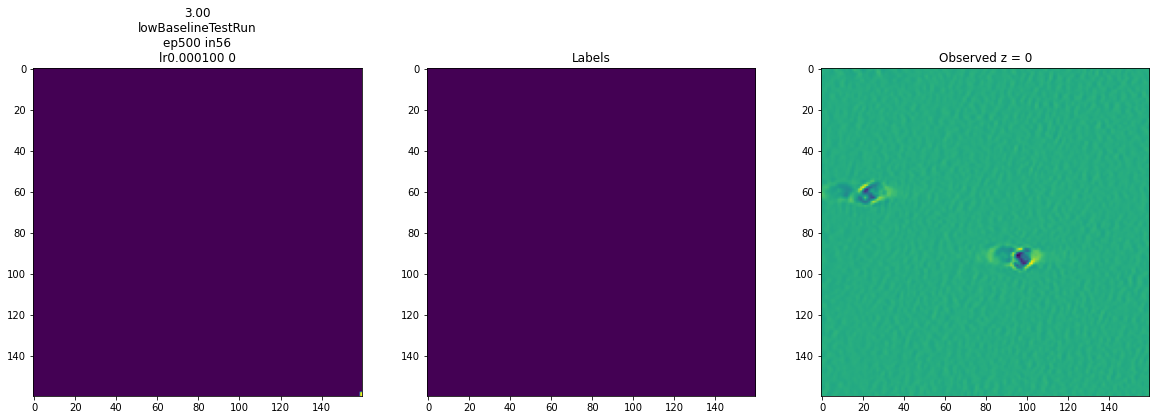

<Figure size 432x288 with 0 Axes>

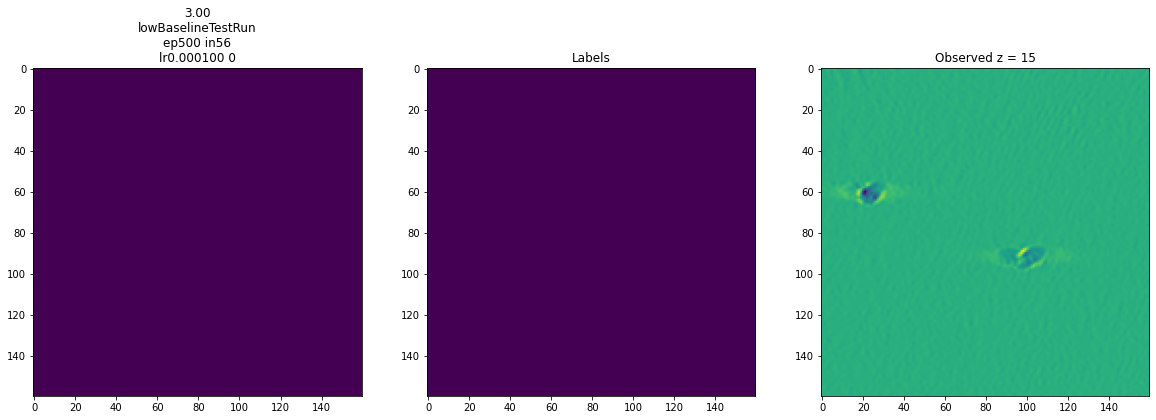

<Figure size 432x288 with 0 Axes>

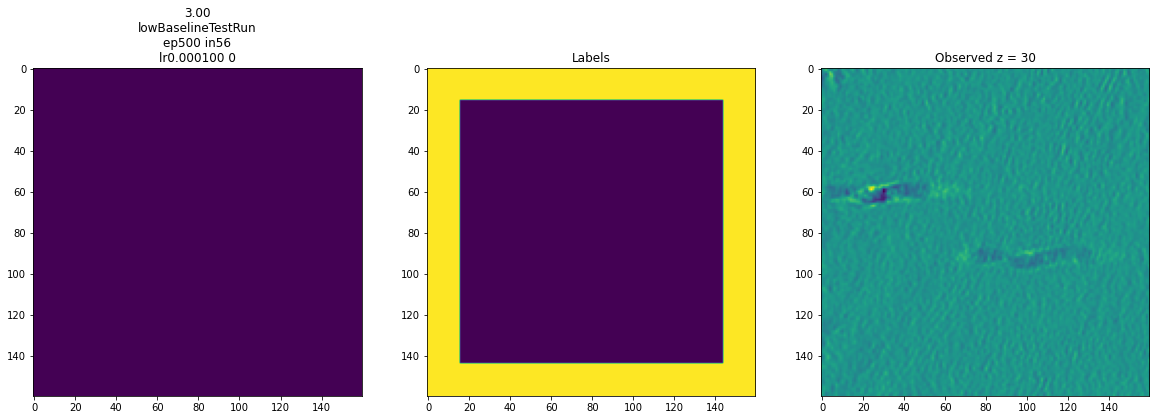

<Figure size 432x288 with 0 Axes>

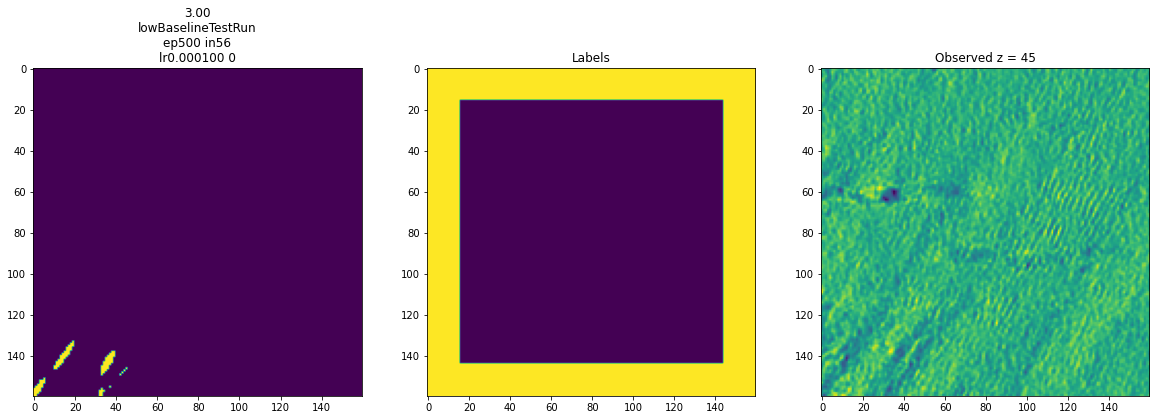

<Figure size 432x288 with 0 Axes>

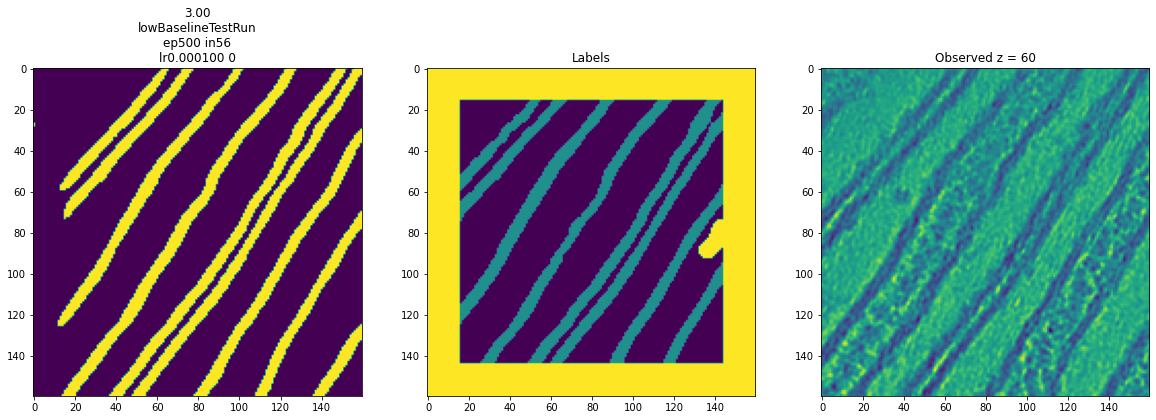

<Figure size 432x288 with 0 Axes>

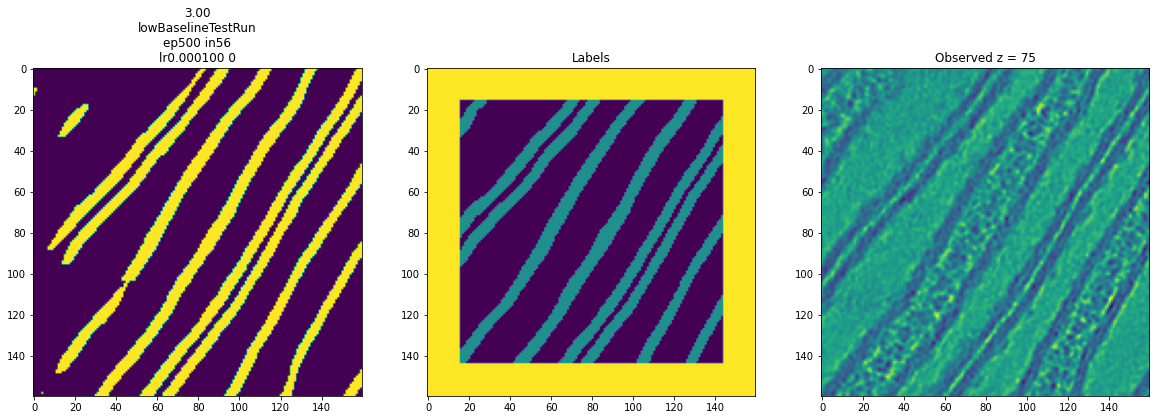

<Figure size 432x288 with 0 Axes>

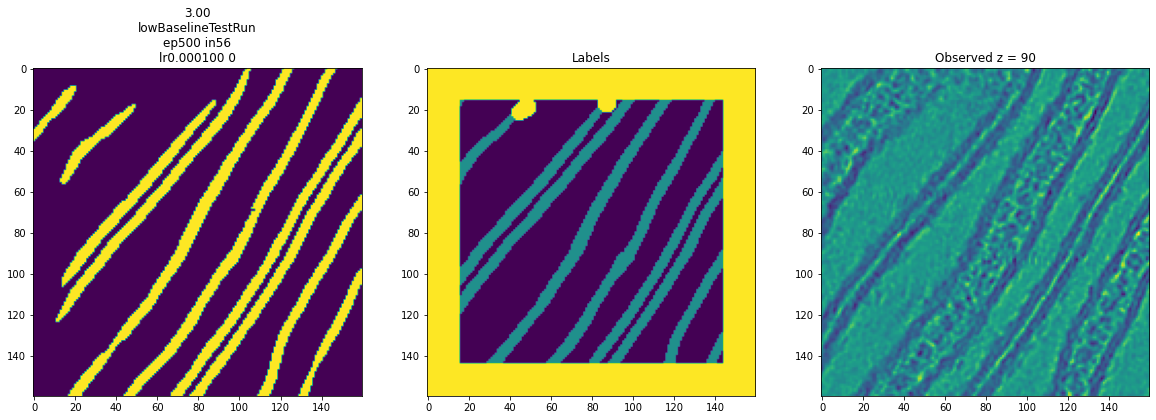

<Figure size 432x288 with 0 Axes>

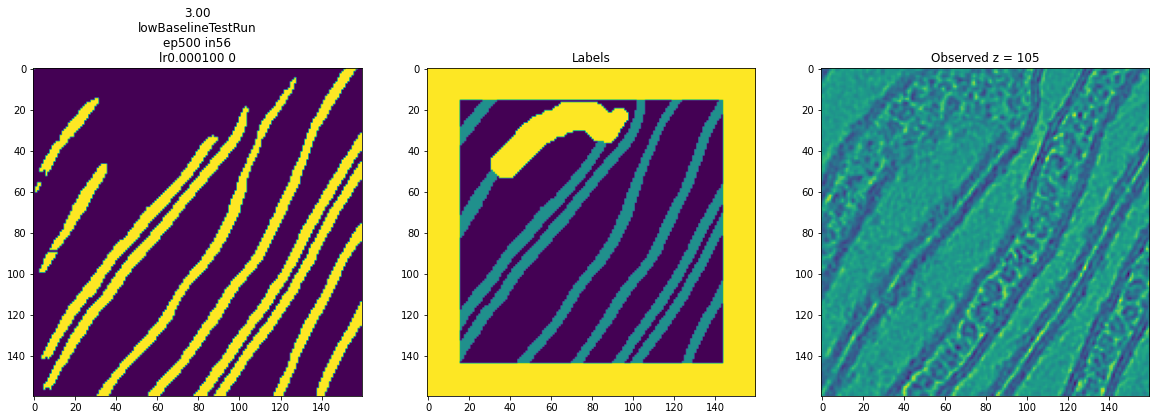

<Figure size 432x288 with 0 Axes>

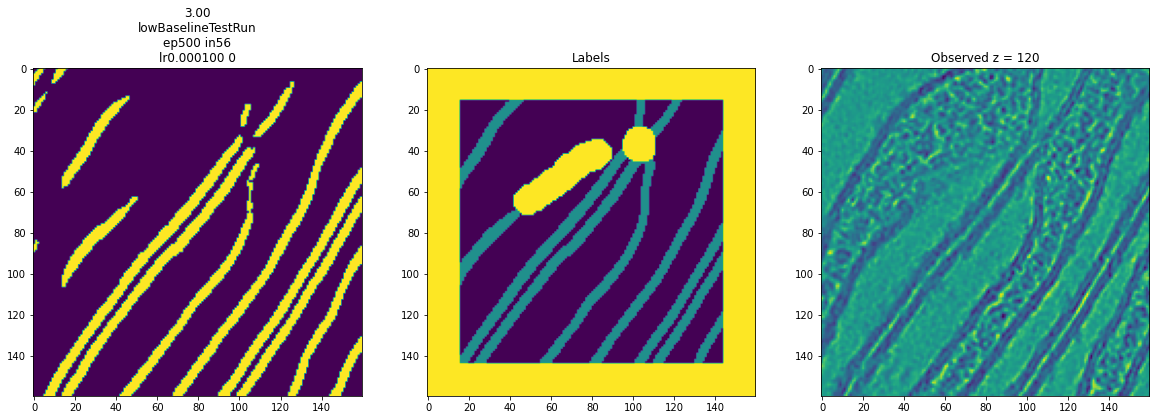

<Figure size 432x288 with 0 Axes>

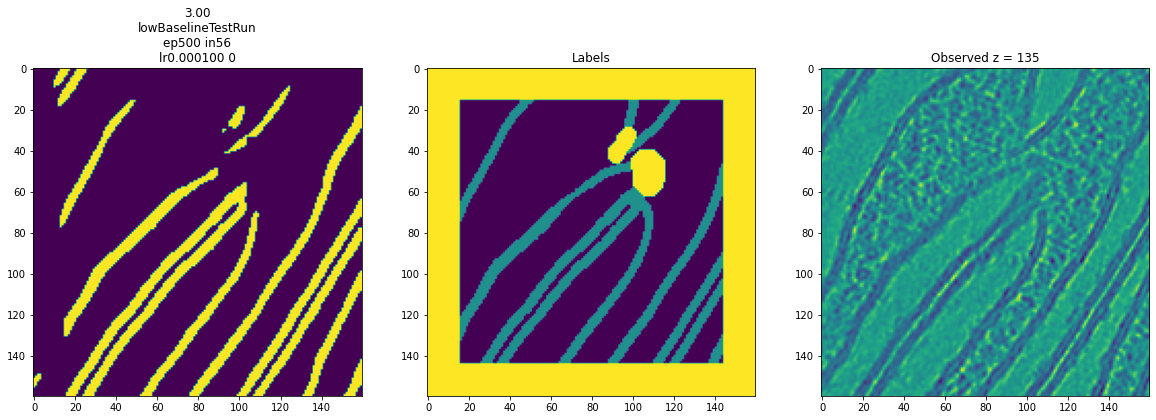

<Figure size 432x288 with 0 Axes>

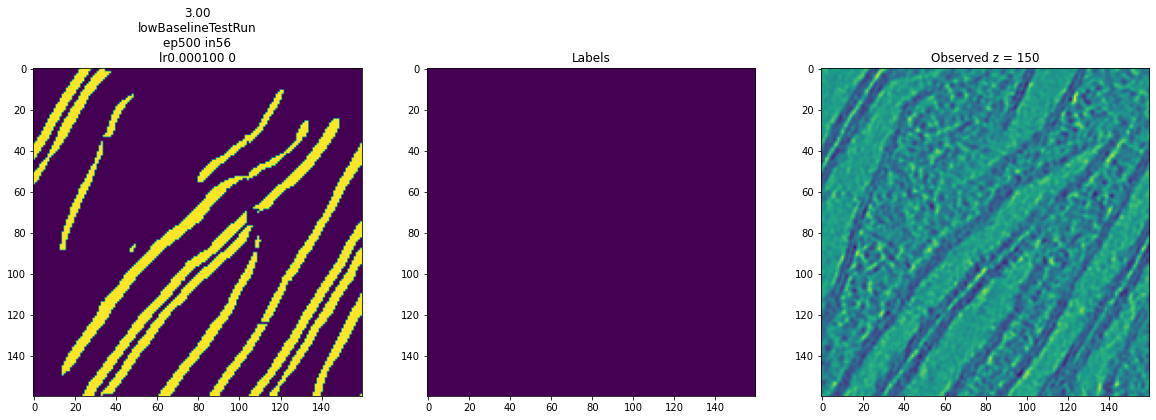

<Figure size 432x288 with 0 Axes>

In [78]:
make_comparison_plot(class1_predDict, classes, tomogram_data)

In [66]:
model_fileList = [os.path.join(PARENT_PATH, 'models_scratchpad/logs/BaselineModel/train02-03-17/version_0/3.00_BaselineTestRun_ep500_in56_lr0.000100_0.model')]
n_centersList = [4]

tomo_file, label_file = paths_valData[0], paths_valTarget[0]


class1_predDict, dice1_dict, classes, tomogram_data = fullTomogram_modelComparison2(model_fileList, n_centersList, tomo_file, label_file)

Tomogram shape:  (160, 160, 160)
Predicting full tomogram using 4 centers...


100%|██████████| 64/64 [00:02<00:00, 23.41it/s]


Saving model predictions...


In [68]:
dice1_dict

{'3.00_BaselineTestRun_ep500_in56_lr0.000100_0': tensor([0.5428, 0.0000], device='cuda:0')}

In [73]:
np.unique(class1_predDict['3.00_BaselineTestRun_ep500_in56_lr0.000100_0'])

array([0, 1])

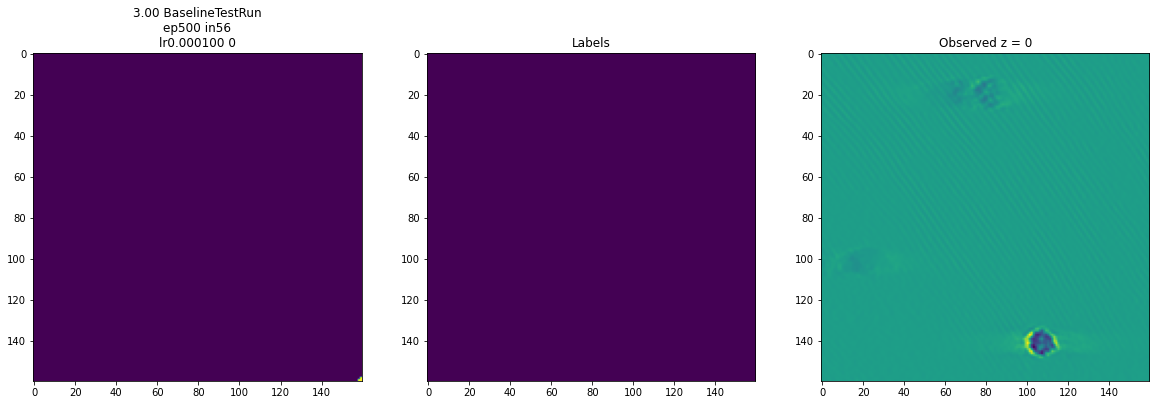

<Figure size 432x288 with 0 Axes>

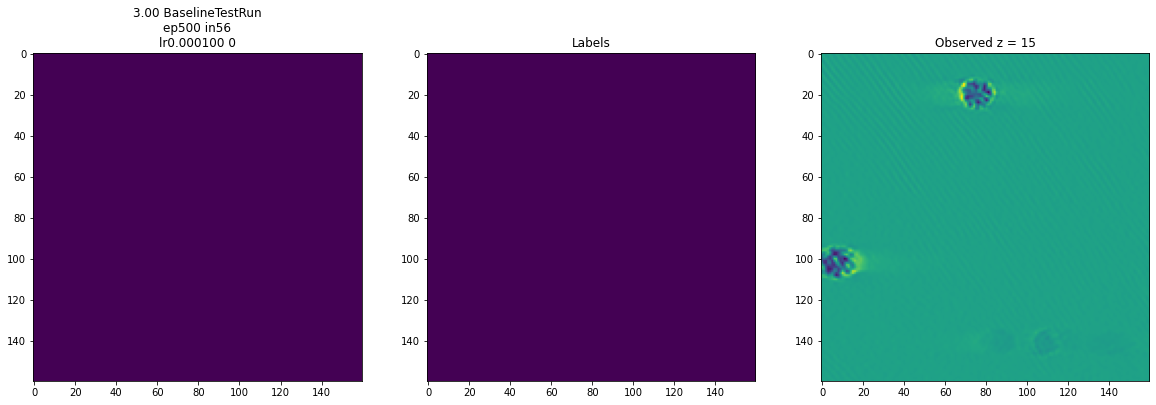

<Figure size 432x288 with 0 Axes>

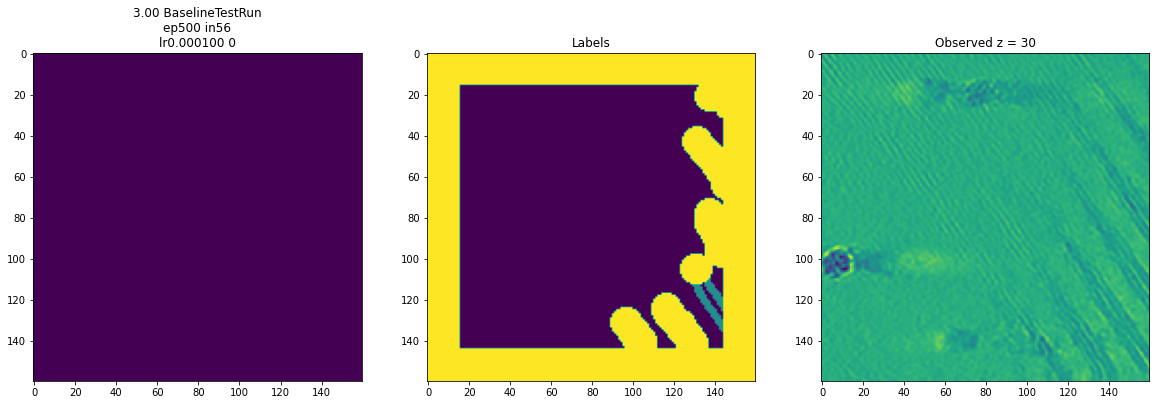

<Figure size 432x288 with 0 Axes>

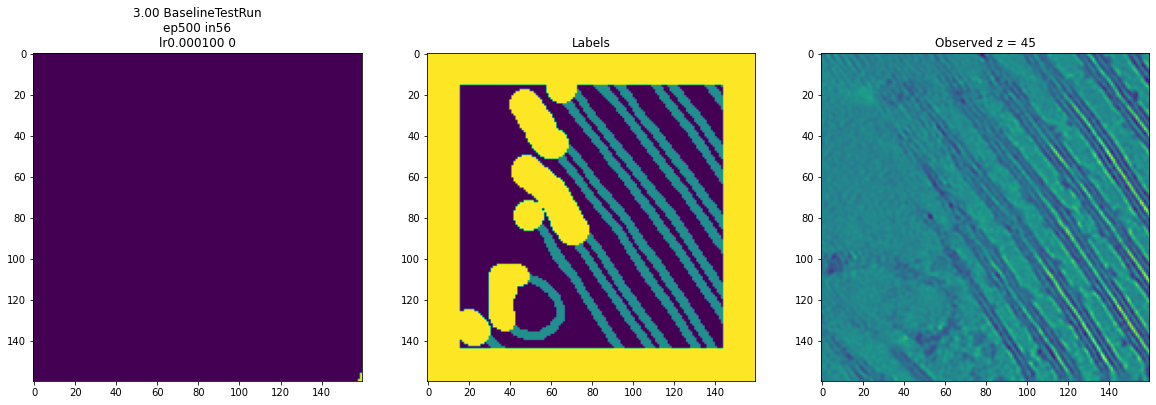

<Figure size 432x288 with 0 Axes>

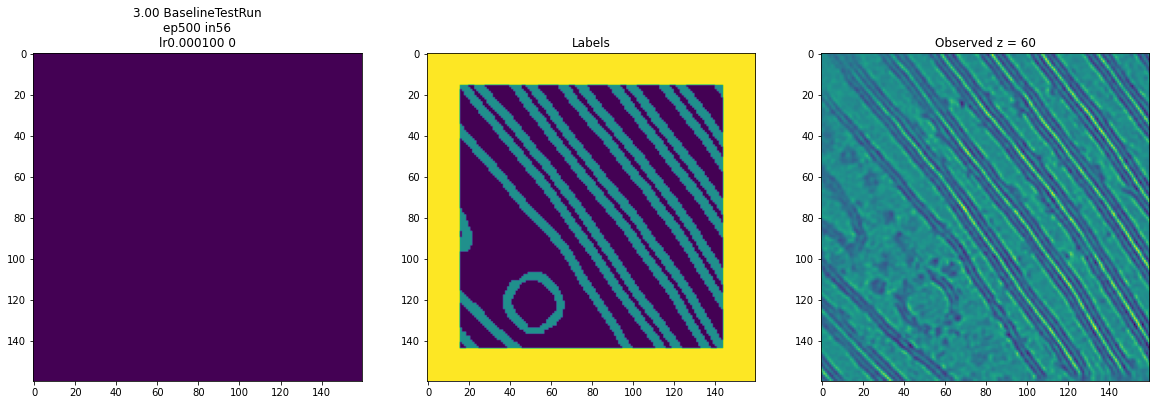

<Figure size 432x288 with 0 Axes>

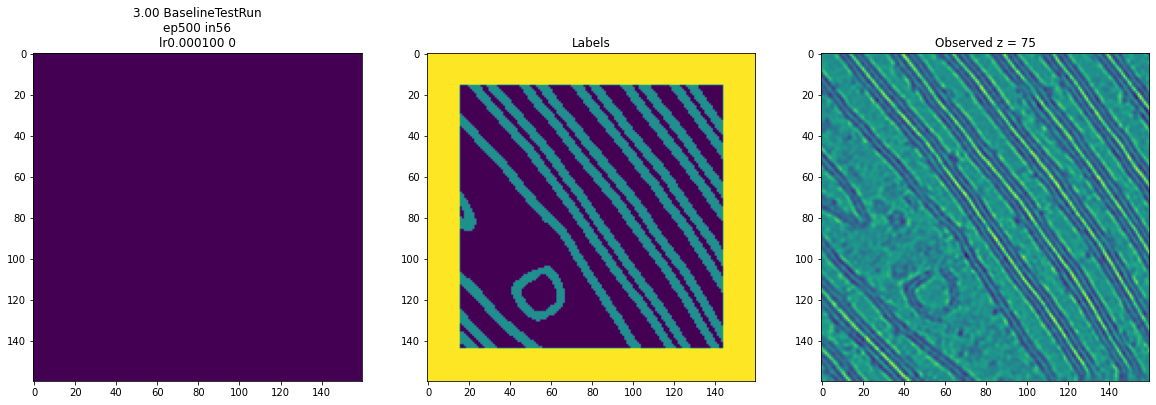

<Figure size 432x288 with 0 Axes>

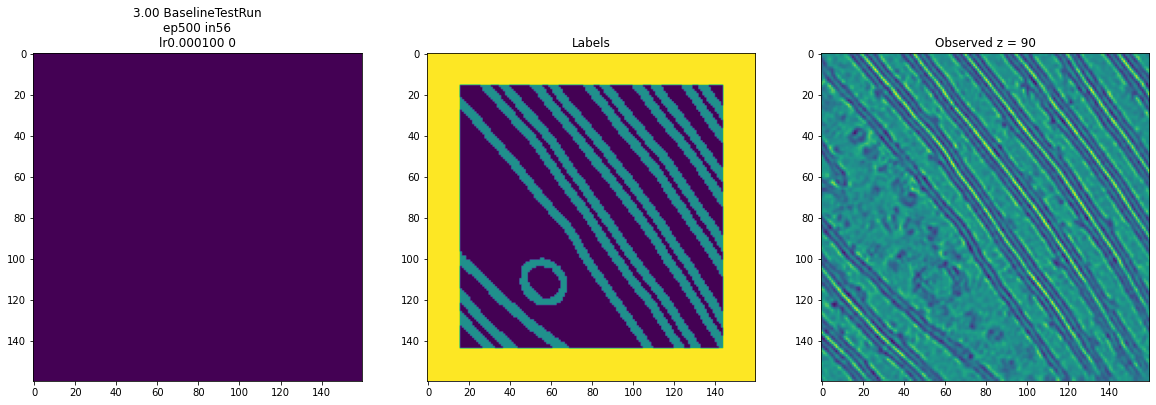

<Figure size 432x288 with 0 Axes>

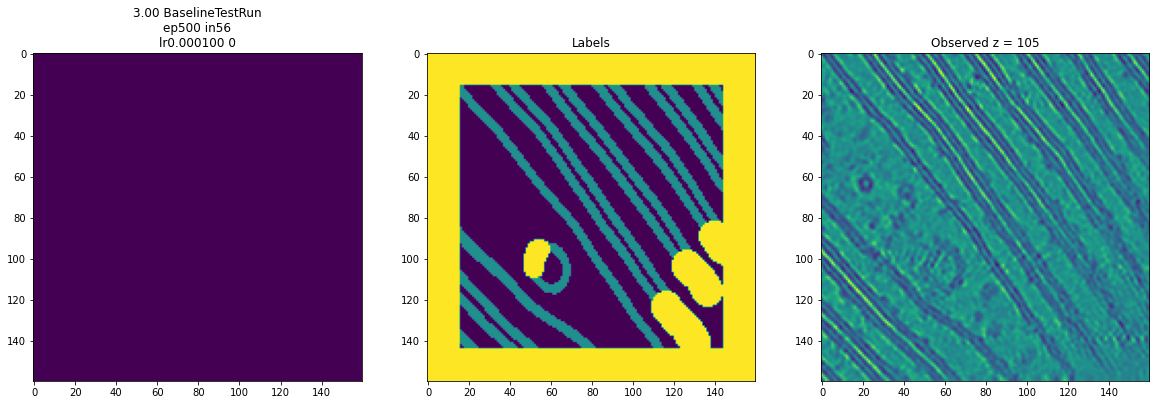

<Figure size 432x288 with 0 Axes>

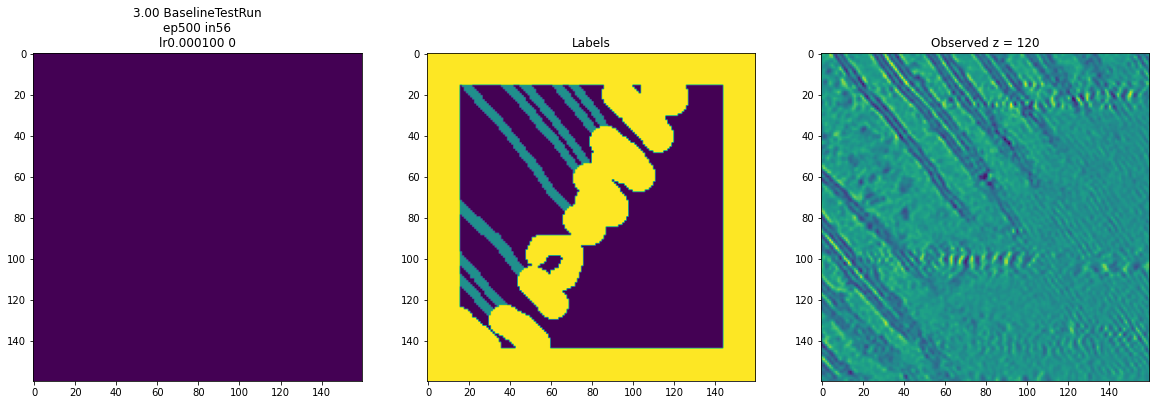

<Figure size 432x288 with 0 Axes>

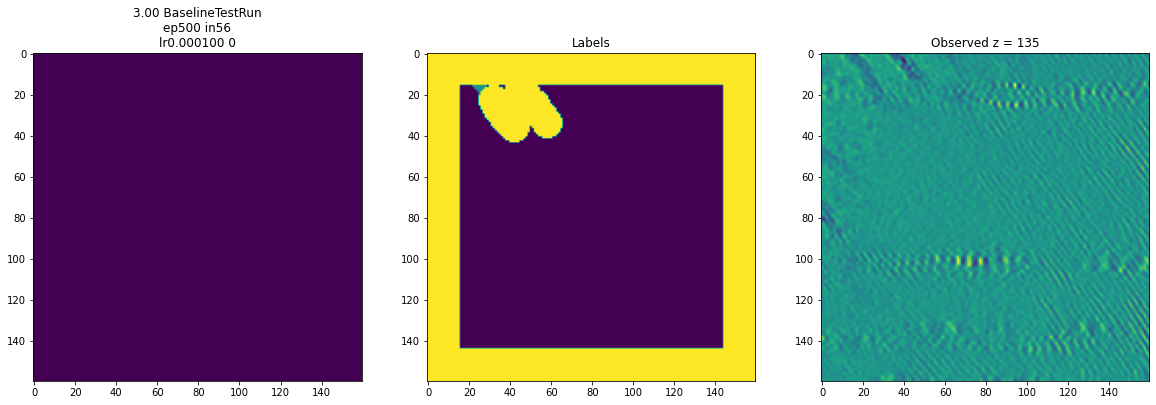

<Figure size 432x288 with 0 Axes>

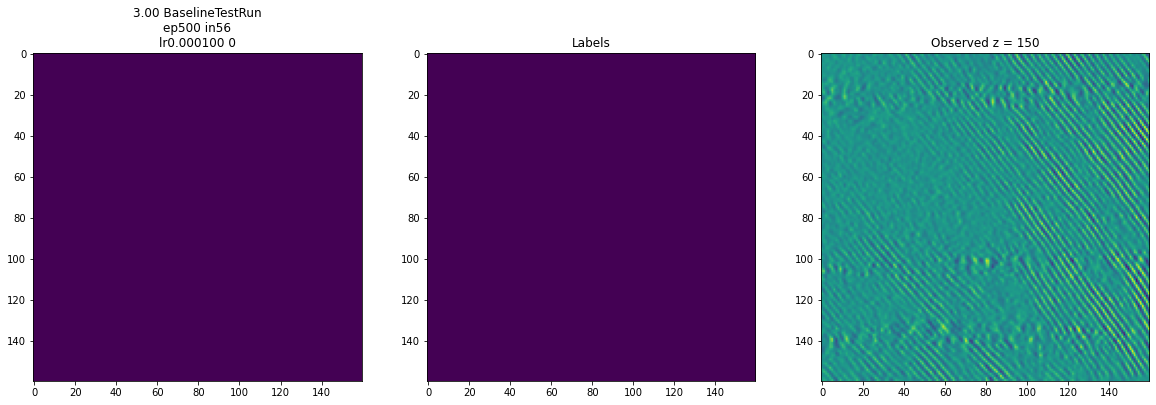

<Figure size 432x288 with 0 Axes>

In [67]:
make_comparison_plot(class1_predDict, classes, tomogram_data)